In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
df = pd.read_csv('customer churn.csv', header=0)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum().sum()

np.int64(0)

#convert 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [27]:
def conv(value):
    if value == 1:
        return "YES"
    else:
        return "NO"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

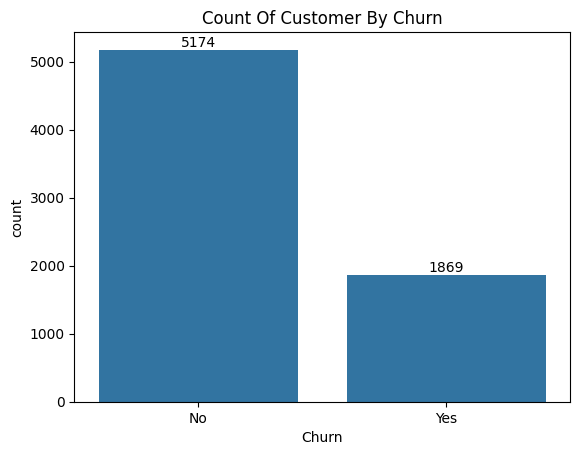

In [10]:
ax = sns.countplot(x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

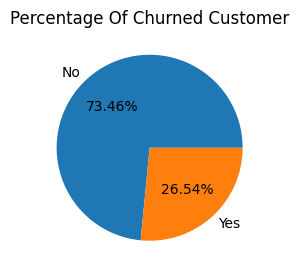

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage Of Churned Customer") 
plt.show()

#from the given pie chart we can conclude that 26.54% of our customer have churn out.
#now let's explore the reasone behind it

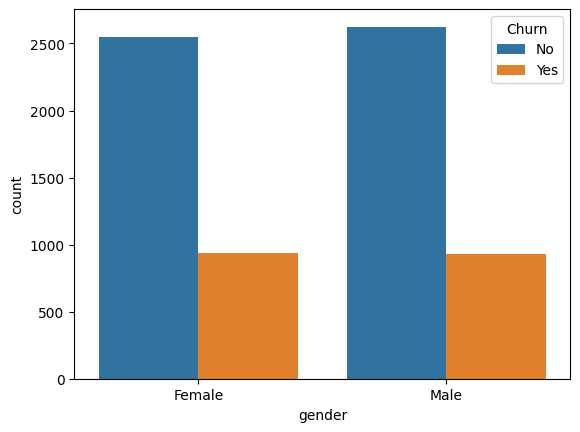

In [12]:
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.show()

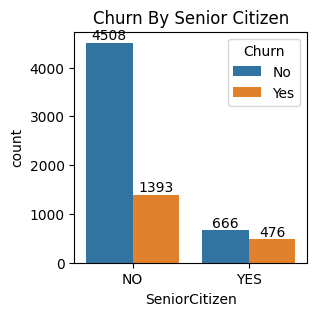

In [28]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Senior Citizen")
plt.show()

In [15]:
# Correct the typo in the column name
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


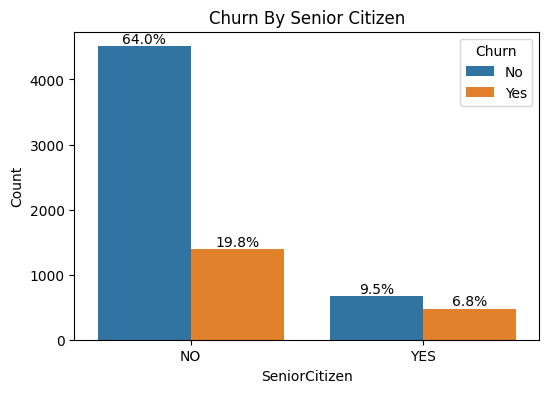

In [16]:
# Calculate the total number of entries
total = len(df)

# Group by 'Churn' and 'SeniorCitizen' and count the occurrences
grouped_df = df.groupby(['Churn', 'SeniorCitizen']).size().reset_index(name='Count')

# Create the count plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='SeniorCitizen', y='Count', hue='Churn', data=grouped_df)

# Add labels to the bars
for container in ax.containers:
    labels = [f'{(v.get_height() / total) * 100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels)

# Set the title of the plot
plt.title("Churn By Senior Citizen")

# Display the plot
plt.show()

#comparative a greater percentage of people in senior citizen category have churned

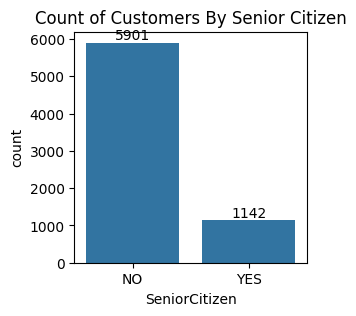

In [20]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By Senior Citizen")
plt.show()

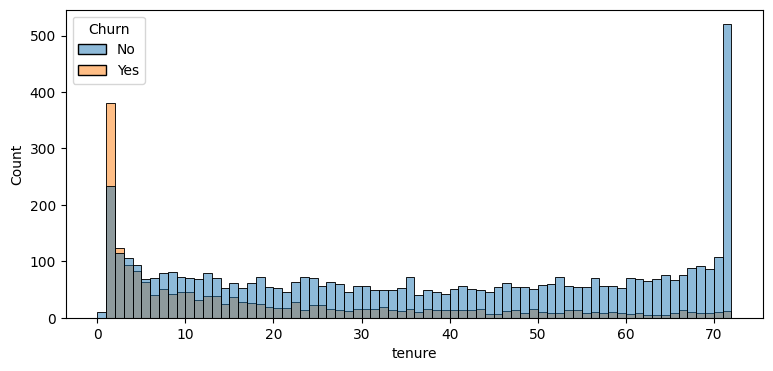

In [23]:
plt.figure(figsize = (9,4))
sns.histplot(x= "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#people who have used our services for long time have stayed and poeple who have used our services 1 or 2 months have churned

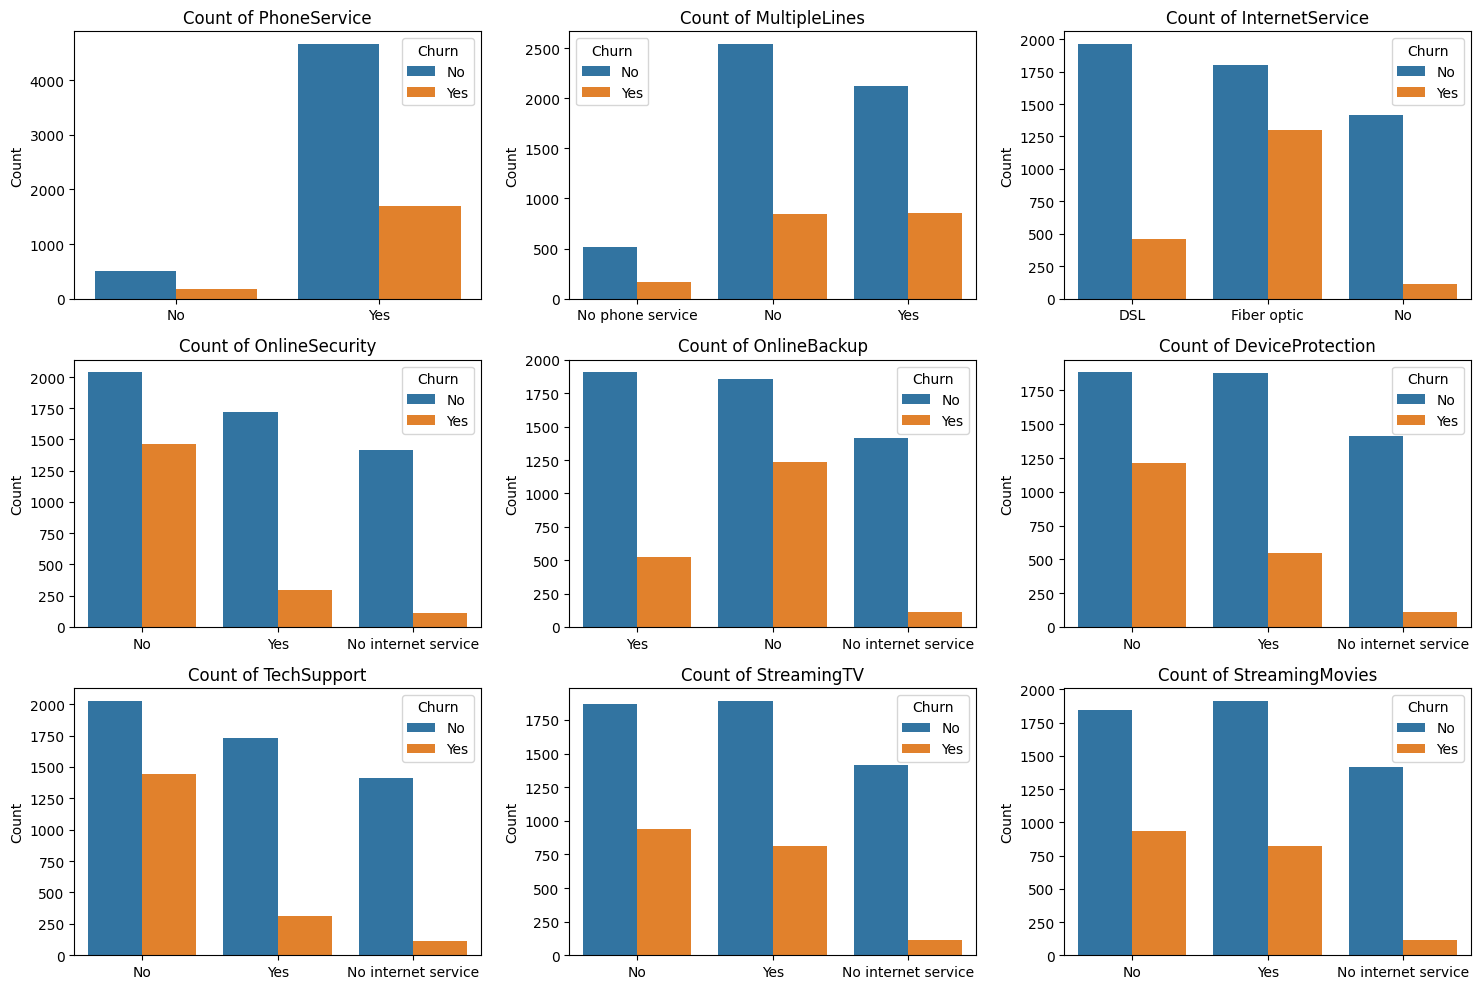

In [27]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for subplots
n_cols = 3

# Calculate the number of rows needed
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a count plot for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i],hue = df["Churn"])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


#Overall, customers who lack additional services like online security, online backup, device protection, and tech support are more likely to churn. Additionally, those using fiber optic internet or having multiple phone lines show a higher churn rate. Streaming services for TV and movies also correlate with increased churn.

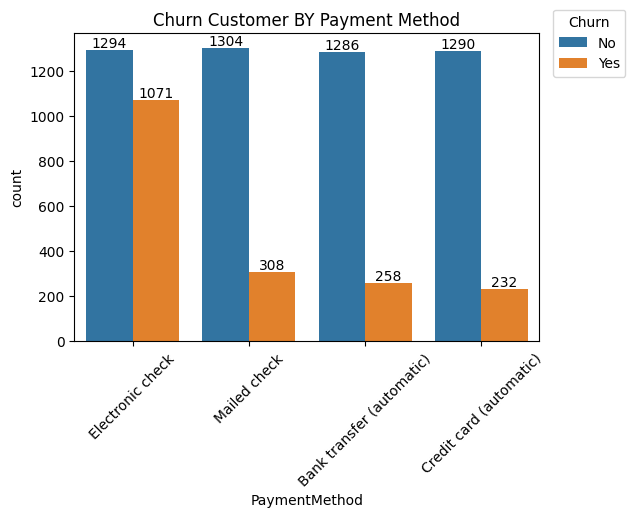

In [24]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x= "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn Customer BY Payment Method")
plt.xticks(rotation = 45)
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

#customer likely to churn when he is using electronic check as a payment method.